In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('asthma_disease_data.csv')

In [3]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [4]:
data = data.drop(['PatientID', 'Ethnicity', 'EducationLevel', 'DoctorInCharge'], axis=1)


In [5]:
from ctgan import CTGAN
ctgan = CTGAN ( verbose=True)
ctgan.fit(data, epochs = 200)

Gen. (-3.44) | Discrim. (0.01): 100%|█████████| 200/200 [00:14<00:00, 13.82it/s]


In [6]:
synthetic_data = ctgan.sample(10000)

synthetic_data['Age'] = synthetic_data['Age'].clip(lower=5, upper=100)

synthetic_data.to_csv("synthetic_data.csv", index=False)

In [7]:
synthetic_data

,Age,Gender,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,68,0,34.882843,0,8.069167,8.926313,9.531825,1.130765,3.577875,5.197235,...,0,2.014798,3.448310,0,0,0,0,1,1,0
1,43,0,27.469909,0,8.501464,9.487559,4.502429,0.537826,9.262615,2.381250,...,0,2.358115,2.372133,1,0,0,0,1,1,0
2,71,0,29.089889,0,0.588136,0.661980,7.755656,3.454344,4.792185,8.906771,...,0,1.363175,4.244631,0,1,0,1,1,0,0
3,50,0,29.333329,0,7.743432,6.023666,9.046670,2.207671,0.431224,7.709853,...,0,3.328680,4.869287,1,0,1,0,1,0,0
4,72,0,37.449839,1,1.571341,5.286057,7.914306,5.464466,0.537195,-0.414149,...,0,2.161066,5.663628,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,1,40.366438,0,1.924013,8.616442,9.350951,8.438974,-0.429974,6.955582,...,0,4.077656,5.249777,1,1,1,1,1,0,0
9996,50,1,29.685235,0,-1.550673,0.925797,4.496207,3.678008,11.644510,2.062547,...,0,1.333815,4.700430,1,0,1,1,1,0,0
9997,45,1,14.229690,0,5.926072,5.326867,6.482664,0.650915,6.876661,0.378340,...,0,1.528926,5.562713,0,0,1,1,1,1,0
9998,27,0,36.118777,1,6.166299,8.402942,9.479921,2.209694,4.900735,4.355042,...,0,2.052503,5.699061,1,1,0,0,1,1,0


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [9]:
X = synthetic_data.drop(columns=["Diagnosis"])  
y = synthetic_data["Diagnosis"]  

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42 , class_weight='balanced')

rfmodel.fit(X_train, y_train)  

RandomForestClassifier(class_weight='balanced', random_state=42)

In [13]:
accuracy = rfmodel.score(X_test, y_test)  
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9830


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

dnmodel = Sequential()
dnmodel.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
dnmodel.add(Dense(units=32, activation='relu'))
dnmodel.add(Dense(units=1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
dnmodel.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
dnmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9179 - loss: 0.2487 - val_accuracy: 0.9830 - val_loss: 0.0877
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9811 - loss: 0.0952 - val_accuracy: 0.9830 - val_loss: 0.0871
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9802 - loss: 0.0940 - val_accuracy: 0.9830 - val_loss: 0.0885
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9812 - loss: 0.0868 - val_accuracy: 0.9830 - val_loss: 0.0883
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9838 - loss: 0.0780 - val_accuracy: 0.9830 - val_loss: 0.0897
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9830 - loss: 0.0766 - val_accuracy: 0.9830 - val_loss: 0.0900
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9810 - loss: 0.0817 - val_accuracy: 0.9830 - val_loss: 0.0919
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9812 - loss: 0.0773 - 

In [16]:
loss, accuracy = dnmodel.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9788 - loss: 0.2105
Test Accuracy: 97.75%


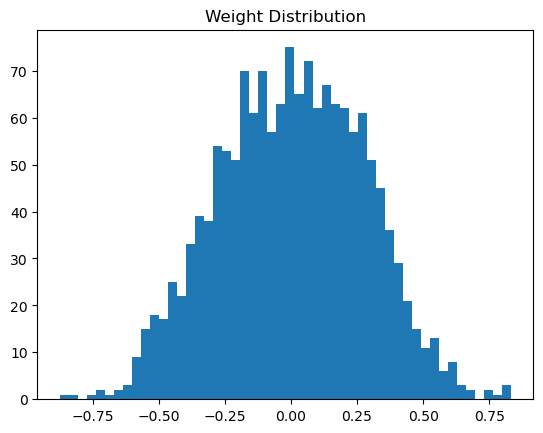

In [17]:
import matplotlib.pyplot as plt
import numpy as np

weights = dnmodel.layers[0].get_weights()[0] 
plt.hist(weights.flatten(), bins=50)
plt.title("Weight Distribution")
plt.show()

In [18]:
from tensorflow import keras

annmodel = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])


In [19]:
annmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
annmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8524 - loss: 0.4084 - val_accuracy: 0.9830 - val_loss: 0.0918
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9831 - loss: 0.0905 - val_accuracy: 0.9830 - val_loss: 0.0885
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9820 - loss: 0.0890 - val_accuracy: 0.9830 - val_loss: 0.0885
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9794 - loss: 0.0953 - val_accuracy: 0.9830 - val_loss: 0.0895
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9804 - loss: 0.0930 - val_accuracy: 0.9830 - val_loss: 0.0895
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9820 - loss: 0.0841 - val_accuracy: 0.9830 - val_loss: 0.0899
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9835 - loss: 0.0768 - val_accuracy: 0.9830 - val_loss: 0.0904
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9796 - loss: 0.0889 - 

In [21]:
loss, accuracy = annmodel.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9773 - loss: 0.1465
Test Accuracy: 97.65%


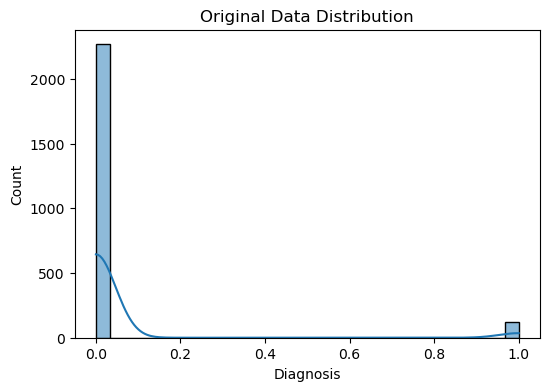

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Diagnosis'], bins=30, kde=True)
plt.title('Original Data Distribution')
plt.show()


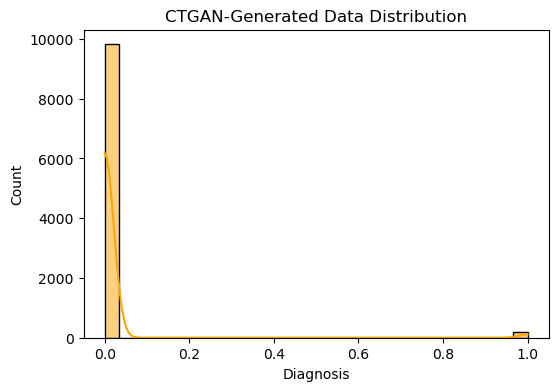

In [23]:
# Load your CTGAN-generated data


# Plot distribution
plt.figure(figsize=(6, 4))
sns.histplot(synthetic_data['Diagnosis'], bins=30, kde=True, color='orange')
plt.title('CTGAN-Generated Data Distribution')
plt.show()


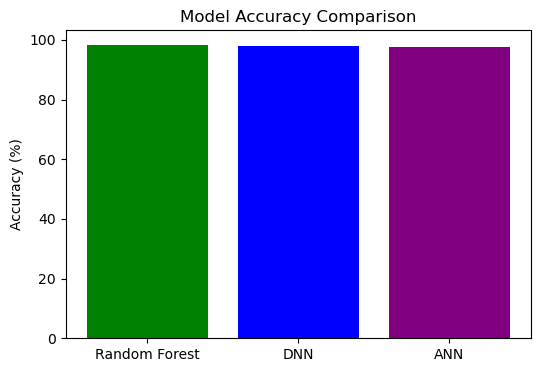

In [24]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Random Forest', 'DNN', 'ANN']
accuracy = [98.3, 97.9, 97.6]

plt.figure(figsize=(6, 4))
plt.bar(algorithms, accuracy, color=['green', 'blue', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()


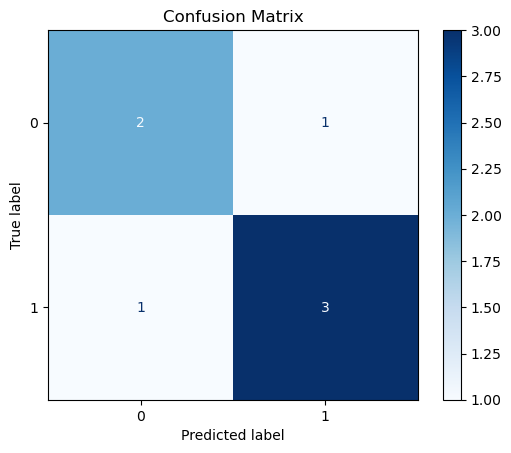

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Example true values and predictions
y_true = [0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 0, 1, 0, 1]

# Display Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error
mae_synthetic = mean_absolute_error(y_test, rfmodel.predict(X_test))
print(f"Random Forest MAE: {mae_synthetic:.4f}")

mae_dnmodel = mean_absolute_error(y_test, dnmodel.predict(X_test).flatten())
print(f"Deep Neural Network MAE: {mae_dnmodel:.4f}")

mae_annmodel = mean_absolute_error(y_test, annmodel.predict(X_test).flatten())
print(f"ANN Model MAE: {mae_annmodel:.4f}")


Random Forest MAE: 0.0170
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Deep Neural Network MAE: 0.0253
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
ANN Model MAE: 0.0308


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Random Forest Model
y_pred_rf = rfmodel.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_sensitivity = tp / (tp + fn)
rf_specificity = tn / (tn + fp)
print(f"Random Forest Sensitivity: {rf_sensitivity:.4f}")
print(f"Random Forest Specificity: {rf_specificity:.4f}")

# Deep Neural Network Model
y_pred_dn = (dnmodel.predict(X_test) > 0.5).astype(int).flatten()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dn).ravel()
dn_sensitivity = tp / (tp + fn)
dn_specificity = tn / (tn + fp)
print(f"Deep Neural Network Sensitivity: {dn_sensitivity:.4f}")
print(f"Deep Neural Network Specificity: {dn_specificity:.4f}")

# ANN Model
y_pred_ann = (annmodel.predict(X_test) > 0.5).astype(int).flatten()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ann).ravel()
ann_sensitivity = tp / (tp + fn)
ann_specificity = tn / (tn + fp)
print(f"ANN Model Sensitivity: {ann_sensitivity:.4f}")
print(f"ANN Model Specificity: {ann_specificity:.4f}")


Random Forest Sensitivity: 0.0000
Random Forest Specificity: 1.0000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
Deep Neural Network Sensitivity: 0.0000
Deep Neural Network Specificity: 0.9944
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
ANN Model Sensitivity: 0.0000
ANN Model Specificity: 0.9934


In [45]:
#ensemble
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42)  # Increase positive samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


from sklearn.ensemble import  VotingClassifier
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rfmodel),
        ('xgb', xgb_model)
    ],
    voting='soft'  # 'soft' voting uses probabilities, improving sensitivity
)


In [49]:
ensemble_model.fit(X_train_smote, y_train_smote)

# Predictions with Threshold Adjustment for Improved Sensitivity
y_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Probability of class 1
threshold = 0.05  # Lower threshold to boost sensitivity
y_pred_ensemble = (y_proba > threshold).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_ensemble)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ensemble).ravel()
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Ensemble Model Accuracy: {accuracy:.4f}")
print(f"Ensemble Model Sensitivity: {sensitivity:.4f}")
print(f"Ensemble Model Specificity: {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 0.8335
Ensemble Model Sensitivity: 0.1471
Ensemble Model Specificity: 0.8454

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1966
           1       0.02      0.15      0.03        34

    accuracy                           0.83      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.97      0.83      0.89      2000



In [51]:
import joblib

# Save the trained model
joblib.dump(rfmodel, 'Random_forest_Asthma.pkl')

print("Model saved successfully!")


Model saved successfully!
